## EDA: Portuguese Higher and Secondary Education

This notebook explores the shapes, trends, and relationships of the data present in the modelling tables created from the datasets.

### Imports and reading datasets

In [2]:
import os
import sys
sys.path.insert(0, os.path.abspath('../scripts'))
import maps as mp
import matplotlib.pyplot as plt
import pandas as pd

lower_model_df = pd.read_csv("../../data/results/lower_ed_scored.csv")
higher_model_df = pd.read_csv("../../data/results/higher_ed_scored.csv")

In [1]:
print("hello")

hello


### 1. International Students are More Likely to Dropout

In [3]:
print("Higher Ed Columns:", higher_model_df.columns.tolist())
higher_model_df.head()

Higher Ed Columns: ['marital_status', 'course', 'daytime/evening_attendance', 'previous_qualification', 'previous_qualification_(grade)', 'nacionality', "mother's_qualification", "father's_qualification", "mother's_occupation", "father's_occupation", 'admission_grade', 'displaced', 'educational_special_needs', 'debtor', 'tuition_fees_up_to_date', 'gender', 'scholarship_holder', 'age_at_enrollment', 'international', 'curricular_units_1st_sem_(credited)', 'curricular_units_1st_sem_(enrolled)', 'curricular_units_1st_sem_(evaluations)', 'curricular_units_1st_sem_(approved)', 'curricular_units_1st_sem_(grade)', 'curricular_units_1st_sem_(without_evaluations)', 'curricular_units_2nd_sem_(credited)', 'curricular_units_2nd_sem_(enrolled)', 'curricular_units_2nd_sem_(evaluations)', 'curricular_units_2nd_sem_(approved)', 'curricular_units_2nd_sem_(grade)', 'curricular_units_2nd_sem_(without_evaluations)', 'unemployment_rate', 'inflation_rate', 'gdp', 'target', 'dropout_risk(all)', 'dropout_risk(

,marital_status,course,daytime/evening_attendance,previous_qualification,previous_qualification_(grade),nacionality,mother's_qualification,father's_qualification,mother's_occupation,father's_occupation,...,curricular_units_2nd_sem_(approved),curricular_units_2nd_sem_(grade),curricular_units_2nd_sem_(without_evaluations),unemployment_rate,inflation_rate,gdp,target,dropout_risk(all),dropout_risk(external),dropout_risk(performance)
0,1,171,1,1,122.0,1,19,12,5,9,...,0,0.000000,0,10.8,1.4,1.74,Dropout,45.31,48.30,50.50
1,1,9254,1,1,160.0,1,1,3,3,3,...,6,13.666667,0,13.9,-0.3,0.79,Graduate,43.29,93.26,4.60
2,1,9070,1,1,122.0,1,37,37,9,9,...,0,0.000000,0,10.8,1.4,1.74,Dropout,99.99,94.94,99.99
3,1,9773,1,1,122.0,1,38,37,5,3,...,5,12.400000,0,9.4,-0.8,-3.12,Graduate,13.76,23.88,15.88
4,2,8014,0,1,100.0,1,37,38,9,9,...,6,13.000000,0,13.9,-0.3,0.79,Graduate,5.15,33.73,7.99


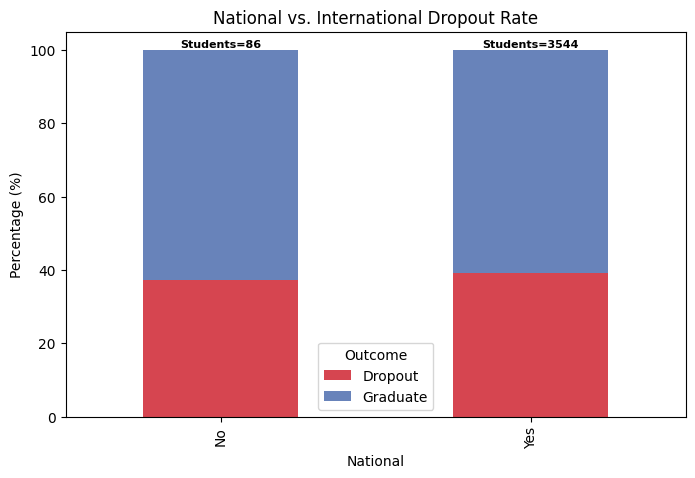

In [16]:
higher_model_df['National'] = higher_model_df['nacionality'].apply(
    lambda x: 'Yes' if x == 1 else 'No'
)

dropout_status = pd.crosstab(
    higher_model_df['National'],
    higher_model_df['target'],
    normalize='index'
) * 100

dropout_status.plot(
    kind='bar', 
    stacked=True,
    figsize=(8,5),
    color=['#D64550', '#6883BA']
)

plt.ylabel("Percentage (%)")
plt.title("National vs. International Dropout Rate")
plt.legend(title="Outcome")

total_students = higher_model_df.groupby('National').size()

for i, count in enumerate(total_students):
    plt.text(i, 103, f'Students={count}', ha='center', va='top', fontsize=8, fontweight='bold')

plt.tight_layout
plt.show()

#### Analysis

From this graph, it can be seen that the percentage of dropouts is slightly higher for national students. However it is important to note that there are significantly less international students compared to national students. With this insight in mind, we believe that a satisfactory conclusion would be... (TBD)

### 2. Students with Parents That Completed Higher Education are Less Likely To Dropout

In [14]:
print("Higher Ed Columns:", higher_model_df.columns.tolist())
higher_model_df.head()

Higher Ed Columns: ['marital_status', 'course', 'daytime/evening_attendance', 'previous_qualification', 'previous_qualification_(grade)', 'nacionality', "mother's_qualification", "father's_qualification", "mother's_occupation", "father's_occupation", 'admission_grade', 'displaced', 'educational_special_needs', 'debtor', 'tuition_fees_up_to_date', 'gender', 'scholarship_holder', 'age_at_enrollment', 'international', 'curricular_units_1st_sem_(credited)', 'curricular_units_1st_sem_(enrolled)', 'curricular_units_1st_sem_(evaluations)', 'curricular_units_1st_sem_(approved)', 'curricular_units_1st_sem_(grade)', 'curricular_units_1st_sem_(without_evaluations)', 'curricular_units_2nd_sem_(credited)', 'curricular_units_2nd_sem_(enrolled)', 'curricular_units_2nd_sem_(evaluations)', 'curricular_units_2nd_sem_(approved)', 'curricular_units_2nd_sem_(grade)', 'curricular_units_2nd_sem_(without_evaluations)', 'unemployment_rate', 'inflation_rate', 'gdp', 'target', 'dropout_risk(all)', 'dropout_risk(

,marital_status,course,daytime/evening_attendance,previous_qualification,previous_qualification_(grade),nacionality,mother's_qualification,father's_qualification,mother's_occupation,father's_occupation,...,curricular_units_2nd_sem_(grade),curricular_units_2nd_sem_(without_evaluations),unemployment_rate,inflation_rate,gdp,target,dropout_risk(all),dropout_risk(external),dropout_risk(performance),National
0,1,171,1,1,122.0,1,19,12,5,9,...,0.000000,0,10.8,1.4,1.74,Dropout,45.31,48.30,50.50,Yes
1,1,9254,1,1,160.0,1,1,3,3,3,...,13.666667,0,13.9,-0.3,0.79,Graduate,43.29,93.26,4.60,Yes
2,1,9070,1,1,122.0,1,37,37,9,9,...,0.000000,0,10.8,1.4,1.74,Dropout,99.99,94.94,99.99,Yes
3,1,9773,1,1,122.0,1,38,37,5,3,...,12.400000,0,9.4,-0.8,-3.12,Graduate,13.76,23.88,15.88,Yes
4,2,8014,0,1,100.0,1,37,38,9,9,...,13.000000,0,13.9,-0.3,0.79,Graduate,5.15,33.73,7.99,Yes


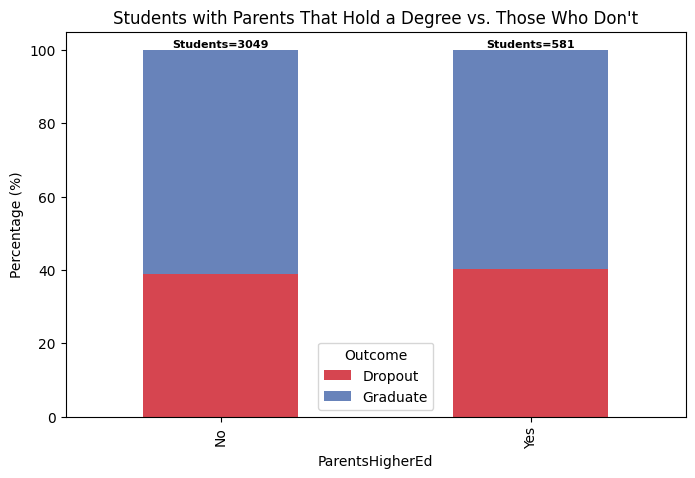

In [18]:
higher_model_df["ParentsHigherEd"] = higher_model_df.apply(
    lambda x: "Yes" if x["mother's_qualification"] in [2,3,4,5] or x["father's_qualification"] in [2,3,4,5] else "No",
    axis=1
)

dropout_status = pd.crosstab(
    higher_model_df['ParentsHigherEd'],
    higher_model_df['target'],
    normalize='index'
) * 100

dropout_status.plot(
    kind='bar', 
    stacked=True,
    figsize=(8,5),
    color=['#D64550', '#6883BA']
)

plt.ylabel("Percentage (%)")
plt.title("Students with Parents That Hold a Degree vs. Those Who Don't")
plt.legend(title="Outcome")

total_students = higher_model_df.groupby('ParentsHigherEd').size()

for i, count in enumerate(total_students):
    plt.text(i, 103, f'Students={count}', ha='center', va='top', fontsize=8, fontweight='bold')

plt.tight_layout
plt.show()

#### Analysis

*Talk About in Meeting*